In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | fayaoue
Processing Record 7 of Set 1 | touba
Processing Record 8 of Set 1 | baykit
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | barawe
City not found. Skipping...
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | manokwari
Processing Record 18 of Set 1 | veraval
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | b

Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | green river
Processing Record 42 of Set 4 | roebourne
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | linxia
Processing Record 45 of Set 4 | nelson bay
Processing Record 46 of Set 4 | rabak
Processing Record 47 of Set 4 | sibolga
Processing Record 48 of Set 4 | poreba
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | daltenganj
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | kalianget
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | talaya
Processing Record 5 of Set 5 | flin flon
Processing Record 6 of Set 5 | ambon
Processing Record 7 of Set 5 | paracuru
Processing Record 8 of Set 5 | suoyarvi
Processing Record 9 of Set 5 | saint-georges
Processing Record 10 of Set 5 | toamasina
Processing Record 11 of Set 5 | haapsalu
Processing Record 12 

Processing Record 27 of Set 8 | tulagi
Processing Record 28 of Set 8 | buta
Processing Record 29 of Set 8 | berasia
Processing Record 30 of Set 8 | buluang
Processing Record 31 of Set 8 | voznesenye
Processing Record 32 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 33 of Set 8 | mersing
Processing Record 34 of Set 8 | srednekolymsk
Processing Record 35 of Set 8 | kentville
Processing Record 36 of Set 8 | zyryanovsk
Processing Record 37 of Set 8 | kimbe
Processing Record 38 of Set 8 | tulum
Processing Record 39 of Set 8 | minchinabad
Processing Record 40 of Set 8 | vadgaon
Processing Record 41 of Set 8 | fare
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | karaul
City not found. Skipping...
Processing Record 44 of Set 8 | cabatuan
Processing Record 45 of Set 8 | moen
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 | lungi
Processing Record 48 of Set 8 | raga
Processing Record 49 of 

Processing Record 9 of Set 12 | aquiraz
Processing Record 10 of Set 12 | andenes
Processing Record 11 of Set 12 | mopipi
Processing Record 12 of Set 12 | ailigandi
Processing Record 13 of Set 12 | pierre
Processing Record 14 of Set 12 | longyan
Processing Record 15 of Set 12 | sioux lookout
Processing Record 16 of Set 12 | katsuura
Processing Record 17 of Set 12 | mpika
Processing Record 18 of Set 12 | berdigestyakh
Processing Record 19 of Set 12 | altamont
Processing Record 20 of Set 12 | pangody
Processing Record 21 of Set 12 | biskamzha
Processing Record 22 of Set 12 | osakarovka
Processing Record 23 of Set 12 | cayenne
Processing Record 24 of Set 12 | kenai
Processing Record 25 of Set 12 | vila
Processing Record 26 of Set 12 | san juan
Processing Record 27 of Set 12 | necochea
Processing Record 28 of Set 12 | harrisburg
Processing Record 29 of Set 12 | biak
Processing Record 30 of Set 12 | rajnagar
Processing Record 31 of Set 12 | tshane
Processing Record 32 of Set 12 | havelock
Pr

In [13]:
len(city_data)

562

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.4612,-71.1419,77.00,73,75,12.66,TC,2021-02-02 21:36:56
1,Ushuaia,-54.8000,-68.3000,55.40,76,75,6.91,AR,2021-02-02 21:34:31
2,Busselton,-33.6500,115.3333,66.00,88,38,4.00,AU,2021-02-02 21:33:08
3,Dikson,73.5069,80.5464,-23.49,84,1,13.85,RU,2021-02-02 21:36:57
4,Bethel,41.3712,-73.4140,30.20,80,90,9.22,US,2021-02-02 21:36:57
5,Fayaoue,-20.6500,166.5333,74.34,86,99,47.85,NC,2021-02-02 21:36:57
6,Touba,8.2833,-7.6833,77.47,24,15,1.03,CI,2021-02-02 21:36:58
7,Baykit,61.6700,96.3700,-8.73,86,100,2.62,RU,2021-02-02 21:36:58
8,Longyearbyen,78.2186,15.6401,19.40,86,75,8.05,SJ,2021-02-02 21:36:58
9,Cabo San Lucas,22.8909,-109.9124,80.01,47,20,12.66,MX,2021-02-02 21:36:59


In [18]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [19]:
city_data_df=city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cockburn Town,TC,2021-02-02 21:36:56,21.4612,-71.1419,77.00,73,75,12.66
1,Ushuaia,AR,2021-02-02 21:34:31,-54.8000,-68.3000,55.40,76,75,6.91
2,Busselton,AU,2021-02-02 21:33:08,-33.6500,115.3333,66.00,88,38,4.00
3,Dikson,RU,2021-02-02 21:36:57,73.5069,80.5464,-23.49,84,1,13.85
4,Bethel,US,2021-02-02 21:36:57,41.3712,-73.4140,30.20,80,90,9.22
5,Fayaoue,NC,2021-02-02 21:36:57,-20.6500,166.5333,74.34,86,99,47.85
6,Touba,CI,2021-02-02 21:36:58,8.2833,-7.6833,77.47,24,15,1.03
7,Baykit,RU,2021-02-02 21:36:58,61.6700,96.3700,-8.73,86,100,2.62
8,Longyearbyen,SJ,2021-02-02 21:36:58,78.2186,15.6401,19.40,86,75,8.05
9,Cabo San Lucas,MX,2021-02-02 21:36:59,22.8909,-109.9124,80.01,47,20,12.66


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

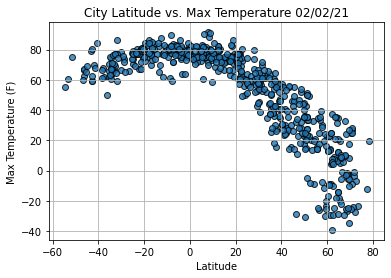

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

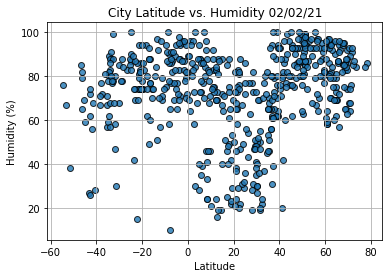

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

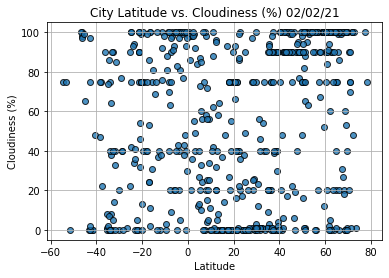

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()